In [1]:
#ML WEEK 5

In [7]:
#untuk menggambar graphnya/pohon 

!pip install graphviz

In [9]:
#library untuk dataset machine learningnya 

!pip install mglearn

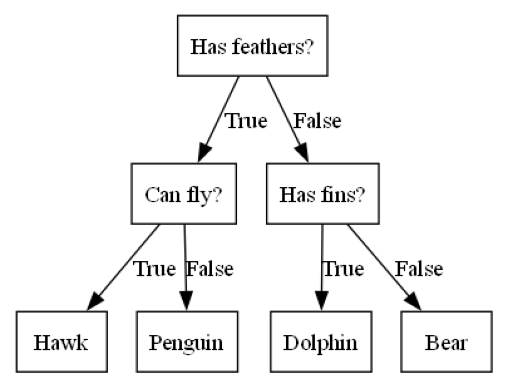

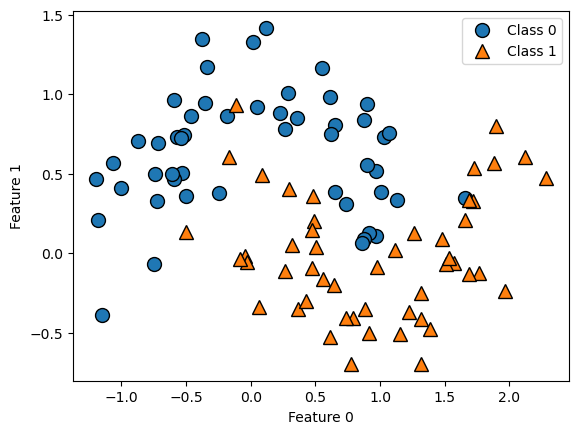

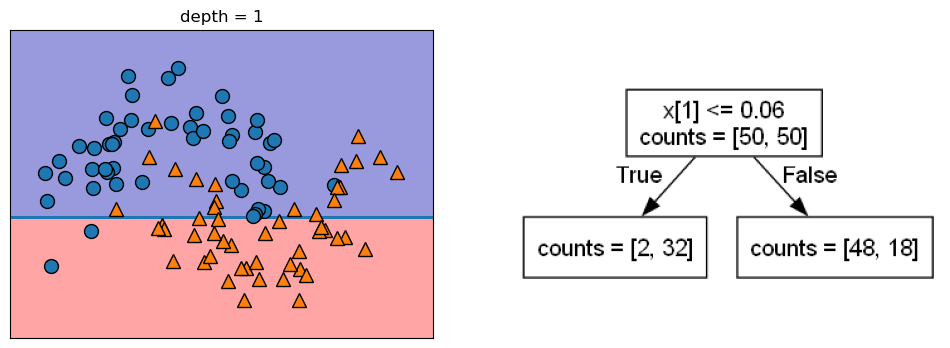

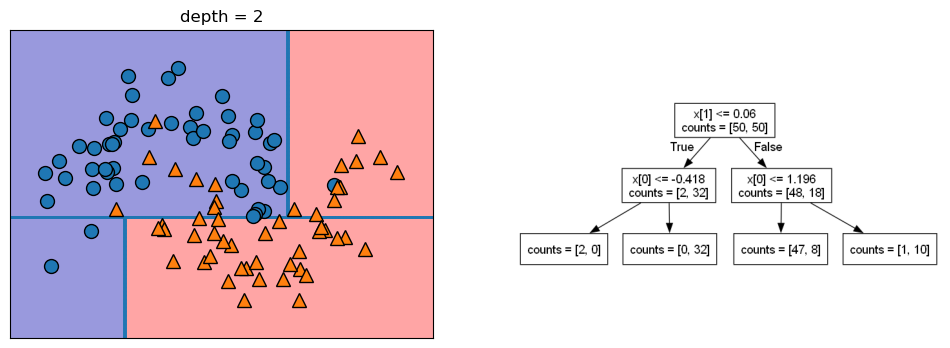

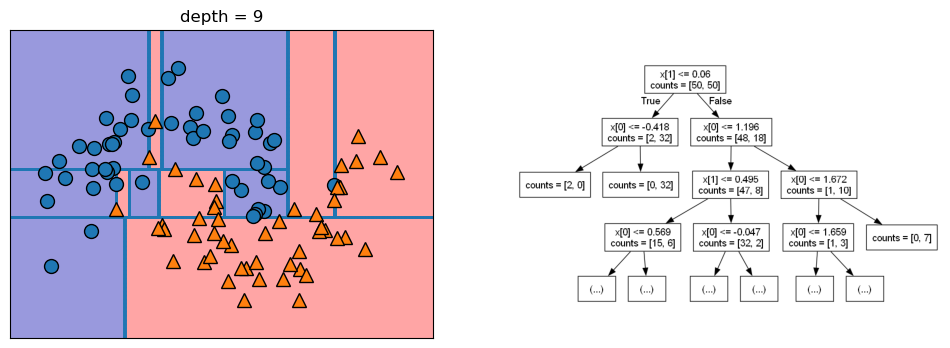

In [35]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt
import graphviz
import os

#nambahin path manual dari download zip
os.environ["PATH"] += os.pathsep + r"C:\Users\vika\Downloads\Graphviz-14.0.0-win32\bin"

#buat bikin tree animal dataset
mglearn.plots.plot_animal_tree()

#cara untuk tahu langkah demi langkah biar tau garis pemisahnya
#menunjukkan langkah-langkah bagaimana Decision Tree dibangun secara visual, pakai dataset sederhana bernama "two moons dataset"
mglearn.plots.plot_tree_progressive()

In [37]:
#cara mengontrol supaya ga overfitting pake pre pruning (membatasi pertumbuhan pohon)
#decisiontreenya buat klasifikasi
#pake pre pruning supaya trainingnya bisa ga sampe 100% tapi testnya hasil lebih bisa dipercaya

from sklearn.tree import DecisionTreeClassifier #buat model decision tree klasifikasi
from sklearn.datasets import load_breast_cancer #dataset
from sklearn.model_selection import train_test_split #bagi data jadi training & testing.

#dataset
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#pre pruning
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

#Pre-pruning = “rem tangan” supaya decision tree nggak kebablasan menghafal data, tapi tetap bisa membuat prediksi yang bagus di data baru.

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [19]:
#dbikin max_depthnya 4

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


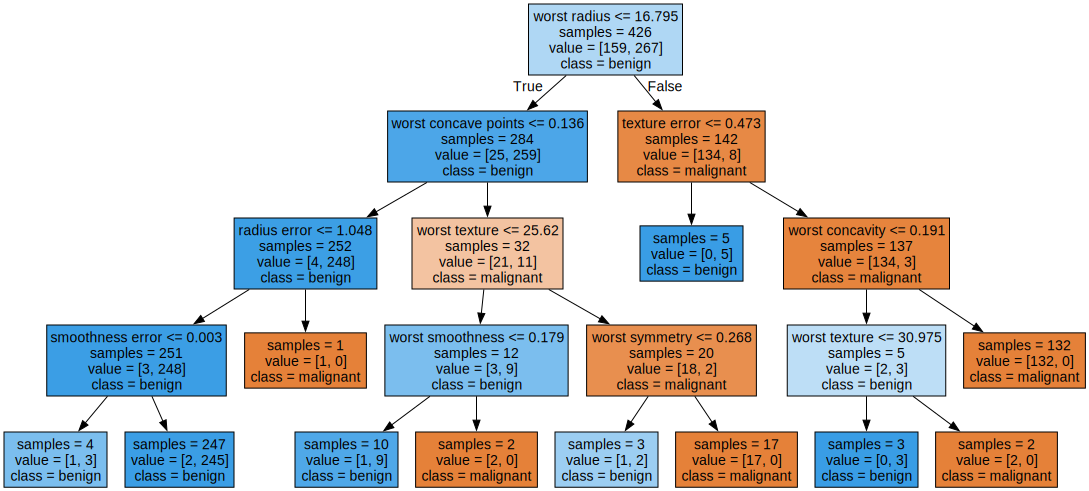

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [51]:
print("Feature importances:\n{}".format(tree.feature_importances_))
#Feature importance = seberapa penting suatu fitur digunakan untuk memecah data dalam pohon keputusan.
#“Decision Tree ternyata nggak perlu semua fitur untuk mengenali hewan. 
#Dari hasil feature importance, hanya beberapa ciri yang benar-benar penting. 
#Misalnya satu fitur punya bobot 72%, artinya pohon hampir selalu melihat ciri itu dulu untuk memutuskan jenis hewan. 
#Fitur lain dengan angka kecil berarti jarang dipakai, bahkan ada yang 0, sama sekali tidak dipakai.”

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


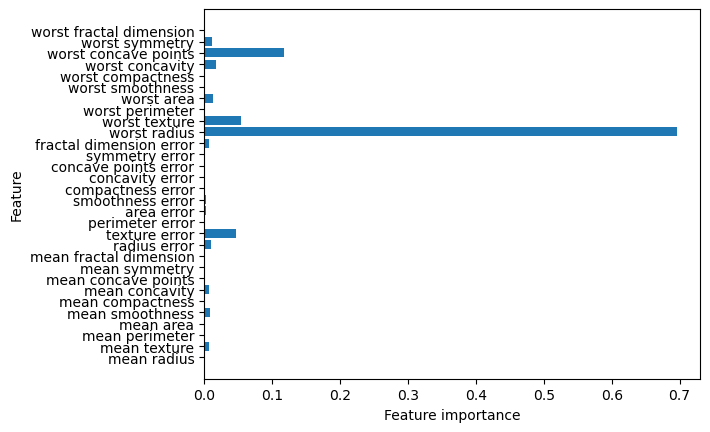

In [43]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


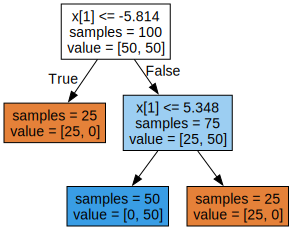

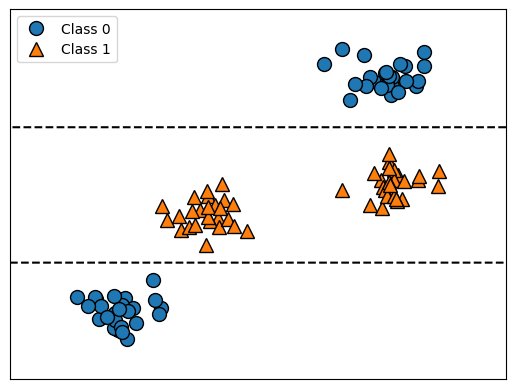

In [53]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#Gambar pohon (kiri)
#→ Semua keputusan (split) di pohon hanya menggunakan X[1].

#Gambar data (kanan)
#→ Garis horizontal hitam menunjukkan pembagian data berdasarkan X[1].

Text(0, 0.5, 'Price in $/Mbyte')

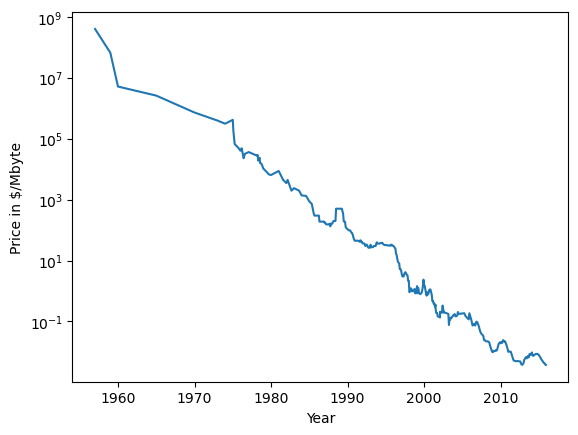

In [47]:
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")                                      

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Buat dataset "moons"
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

# Buat Random Forest dengan 5 pohon
forest = RandomForestClassifier(n_estimators=5, random_state=2)

# Training model
forest.fit(X_train, y_train)

# Tampilkan isi objek forest (ini akan menampilkan konfigurasi model di Jupyter)
forest

RandomForestClassifier(n_estimators=5, random_state=2)

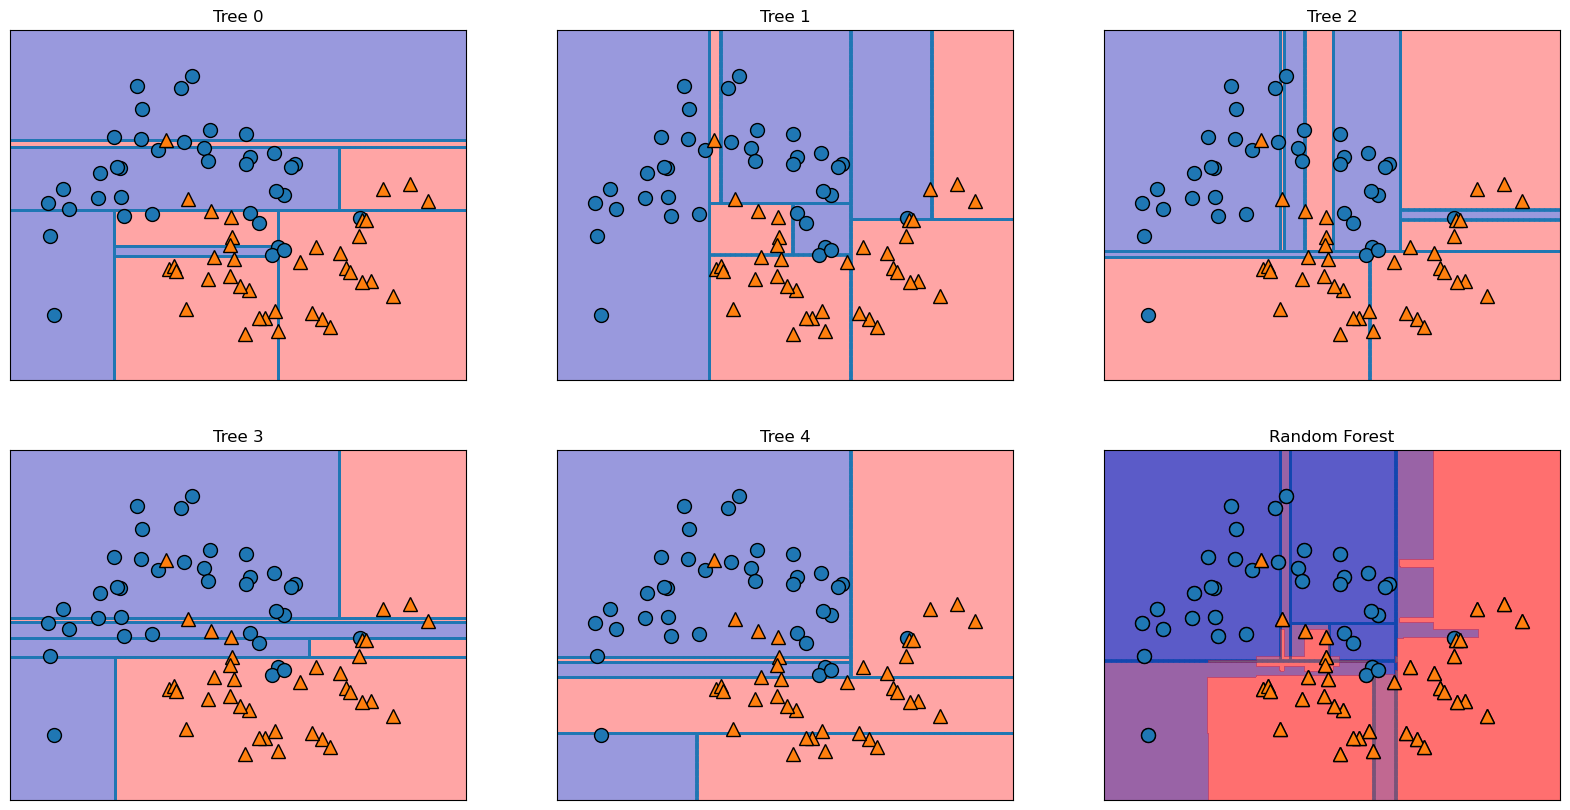

In [55]:
#random foresst, kumpulan banyak pohon keputusan. menunjukkan hasil setelah semua pohon digabung lewat voting. Polanya lebih halus dan lebih cocok buat data asli.
#biar ga menebak" hasinya dan ga overfitting, random forest Hasil tebakan jadi lebih stabil dan lebih akurat.

import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Buat dataset dua bulan
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Split data train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Buat Random Forest dengan beberapa pohon
forest = RandomForestClassifier(n_estimators=6, random_state=2)
forest.fit(x_train, y_train)

# Visualisasi decision boundary tiap pohon + hasil gabungan
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=axes[-1, -1])

plt.show()

#Beberapa pohon tunggal (Tree 0, Tree 1, Tree 2, Tree 3, Tree 4)
#Random Forest (gabungan semua pohon)
#Setiap pohon membuat garis batas (decision boundary) sendiri.

#Karena pohon sering belajar terlalu detail dari data, batasnya terlihat zig-zag / kotak-kotak aneh.

#Ini tanda overfitting → model “ngapalin” data training, bukan memahami pola umum

Accuracy on training set: 1.000
Accuracy on test set: 0.972


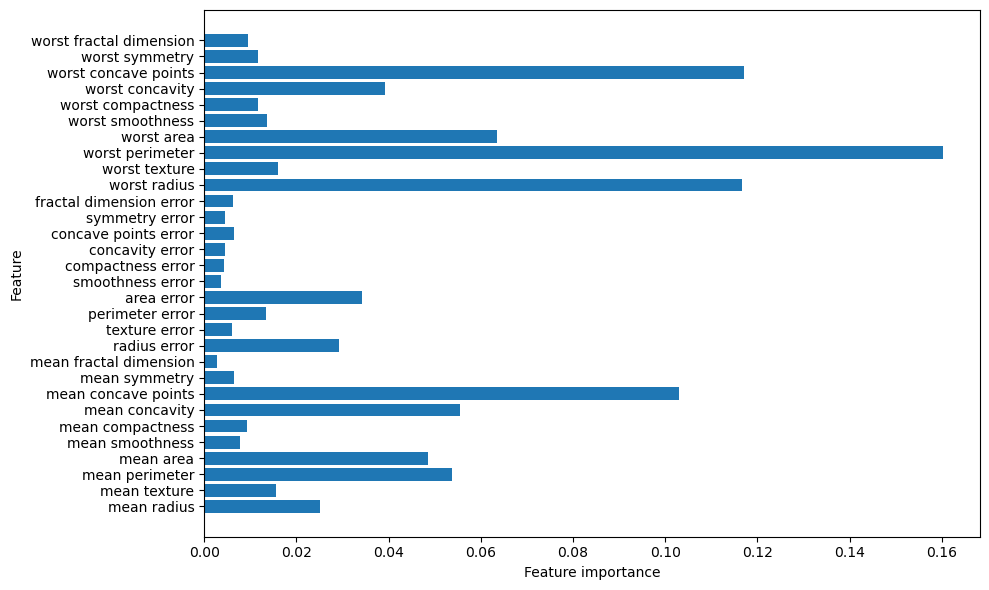

In [57]:
#dataset breast center

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset Breast Cancer
cancer = load_breast_cancer()

# Split train/test
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

# Buat Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

# Tampilkan akurasi
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

# Plot feature importance
importances = forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(cancer.data.shape[1]), importances, align='center')
plt.yticks(range(cancer.data.shape[1]), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Kode ini cuma menyiapkan data dalam bentuk tabel (DataFrame).

#Fungsinya biar lebih gampang dipakai untuk analisis atau machine learning.

#target = label kelas bunga, sedangkan kolom lain adalah fitur yang dipakai untuk membedakan jenis bunga.

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() #dataset dari scikit learn
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #dataframe
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [61]:
#entropy
#Kalau entropy tinggi → datanya campur aduk (kelasnya tidak seragam). Kalau entropy rendah → datanya lebih homogen (kelasnya hampir sama semua).
#Entropy = ukuran ketidakpastian data. Dipakai di Decision Tree untuk memilih fitur terbaik saat membagi data.
from collections import Counter
import math
import pandas as pd
from sklearn.datasets import load_iris

# Fungsi untuk menghitung entropy
def calculate_entropy(data):
    total_elements = len(data)
    class_counts = Counter(data)
    entropy = 0.0
    for count in class_counts.values():
        probability = count / total_elements
        entropy -= probability * math.log2(probability)
    return entropy

# Contoh pakai dataset Iris
iris = load_iris(as_frame=True)
df = iris.frame

# Hitung entropy dari kolom target
target_entropy = calculate_entropy(df['target'])
print(f'Entropy dari target (kelas): {target_entropy}')

#“Entropy target dataset Iris sebesar 1.58, yang merupakan nilai maksimum untuk 3 kelas.

Entropy dari target (kelas): 1.584962500721156


In [11]:
#membuat, melatih, dan menguji Decision Tree.
#Membuat model pohon keputusan, Melatih model dengan data latih, Menguji model dengan data uji, Menghitung akurasi model

from sklearn.tree import DecisionTreeClassifier #model pohon keputusan.
from sklearn.model_selection import train_test_split #untuk membagi data (train & test).
from sklearn.metrics import accuracy_score #untuk mengukur performa model.
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset Iris
iris = load_iris(as_frame=True)
df = iris.frame

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']

# Bagi data jadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Buat model Decision Tree dengan criterion entropy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Prediksi data uji
y_pred = clf.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy}')

#angka akurasi (misalnya 0.97) → menunjukkan seberapa bagus model memprediksi data uji.

Akurasi model Decision Tree: 0.9777777777777777


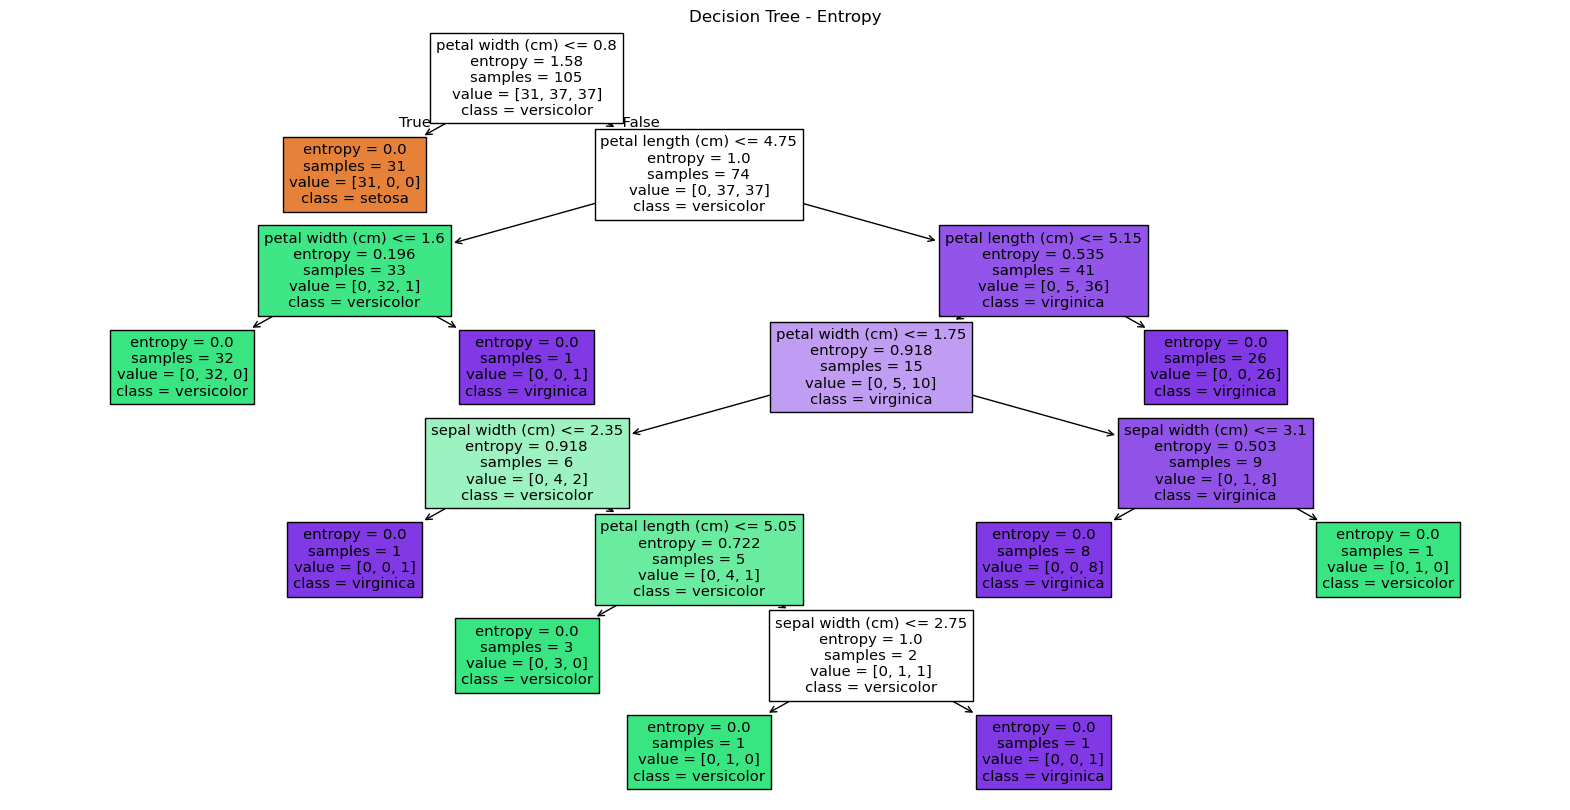

In [15]:
#menggambar pohon keputusan dari model yang sudah dilatih tadi

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title('Decision Tree - Entropy')
plt.show()


Accuracy of ID3 Decision Tree: 0.9777777777777777


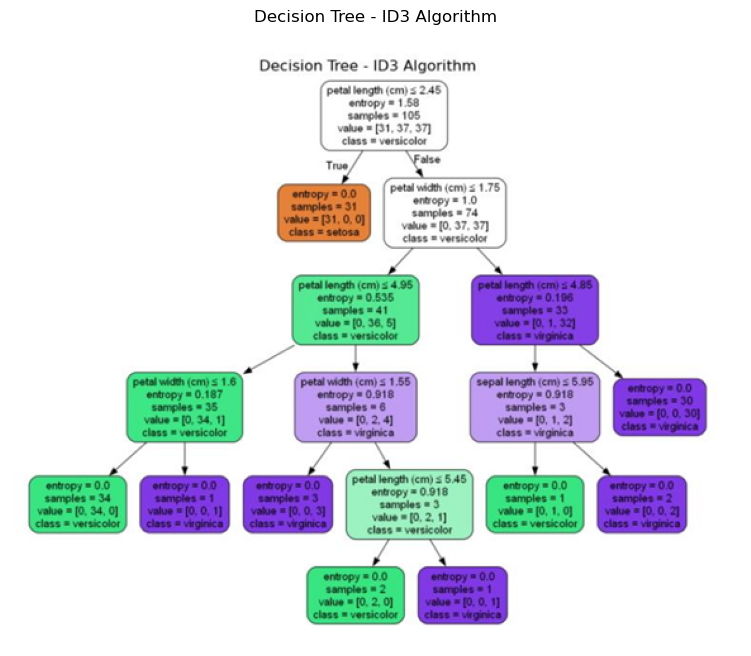

In [23]:
#import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load dataset Iris
iris = load_iris(as_frame=True)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Pisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# Buat model Decision Tree dengan entropy (ID3)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

# Prediksi data uji
y_pred = clf.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of ID3 Decision Tree: {accuracy}")

# Ekspor pohon ke format dot
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render pohon jadi file gambar .png
graph = graphviz.Source(dot_data)
graph.render("Cuplikan layar 2025-09-24 221325.png")

# Tampilkan pohon langsung di notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img = imread(r"C:\Users\vika\Pictures\Cuplikan layar 2025-09-24 221325.png")
plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Decision Tree - ID3 Algorithm")
plt.show()

#akurasi 0.97 → berarti 97% data test berhasil ditebak dengan benar

In [29]:
#mencoba model tree pake algorithm c4.5
#dataset Iris dipisah jadi data training (buat melatih model) dan data testing (buat mengecek performa model).

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #Dipakai untuk membagi data → training & testing.
from sklearn.metrics import accuracy_score #Dipakai untuk mengukur akurasi model.
from sklearn.tree import DecisionTreeClassifier, export_graphviz #buat visualisasi (gambar pohon & grafik).
import graphviz #library visualisasi pohon
import matplotlib.pyplot as plt

# Load dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Bagi data jadi train (70%) dan test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Buat model Decision Tree (C4.5) dengan criterion entropy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Prediksi data test
y_pred = clf.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of C4.5 Decision Tree: {accuracy}")


Accuracy of C4.5 Decision Tree: 0.9777777777777777


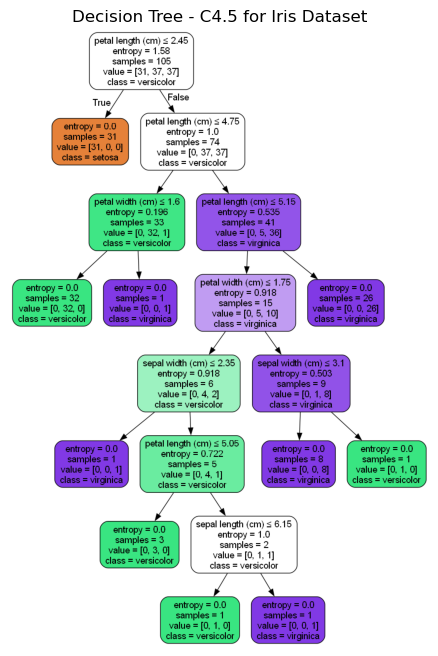

In [31]:
# Plot Decision Tree
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render pohon keputusan ke file PNG
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png')  # Simpan sebagai PNG

# Display tree
graph_image = plt.imread("iris_decision_tree.png")
plt.figure(figsize=(10, 8))
plt.imshow(graph_image)
plt.axis("off")
plt.title("Decision Tree - C4.5 for Iris Dataset")
plt.show()
